In [4]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/insurance (1).csv")
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "sex", color = "smoker", title= "Number of Smokers")
figure.show()

In [7]:
data["sex"] = data["sex"].map({"female": 0, "male": 1})
data["smoker"] = data["smoker"].map({"no": 0, "yes": 1})
print(data.head())

   age  sex   bmi  children  smoker     region  expenses
0   19    0  27.9         0       1  southwest  16884.92
1   18    1  33.8         1       0  southeast   1725.55
2   28    1  33.0         3       0  southeast   4449.46
3   33    1  22.7         0       0  northwest  21984.47
4   32    1  28.9         0       0  northwest   3866.86


In [8]:
import plotly.express as px
pie = data["region"].value_counts()
regions = pie.index
population = pie.values
fig = px.pie(data, values=population, names=regions)
fig.show()

In [9]:
print(data.corr())

               age       sex       bmi  children    smoker  expenses
age       1.000000 -0.020856  0.109341  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046380  0.017163  0.076185  0.057292
bmi       0.109341  0.046380  1.000000  0.012645  0.003968  0.198576
children  0.042469  0.017163  0.012645  1.000000  0.007673  0.067998
smoker   -0.025019  0.076185  0.003968  0.007673  1.000000  0.787251
expenses  0.299008  0.057292  0.198576  0.067998  0.787251  1.000000


<ipython-input-9-40835d1ef585>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [10]:
x = np.array(data[["age", "sex", "bmi", "smoker"]])
y = np.array(data["expenses"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(xtrain, ytrain)

RandomForestRegressor()

In [12]:
ypred = forest.predict(xtest)
data = pd.DataFrame(data={"Predicted Premium Amount": ypred})
print(data.head())

   Predicted Premium Amount
0               9803.763150
1               5593.431083
2              28242.591100
3               9772.065900
4              34670.357820


# USING NEURAL NETWORK

In [13]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
df = pd.read_csv('/content/insurance (1).csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
df["sex"] = df["sex"].map({"female": 0, "male": 1})
df["smoker"] = df["smoker"].map({"no": 0, "yes": 1})
print(df.head())

   age  sex   bmi  children  smoker     region  expenses
0   19    0  27.9         0       1  southwest  16884.92
1   18    1  33.8         1       0  southeast   1725.55
2   28    1  33.0         3       0  southeast   4449.46
3   33    1  22.7         0       0  northwest  21984.47
4   32    1  28.9         0       0  northwest   3866.86


<ipython-input-20-400639a5b570>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




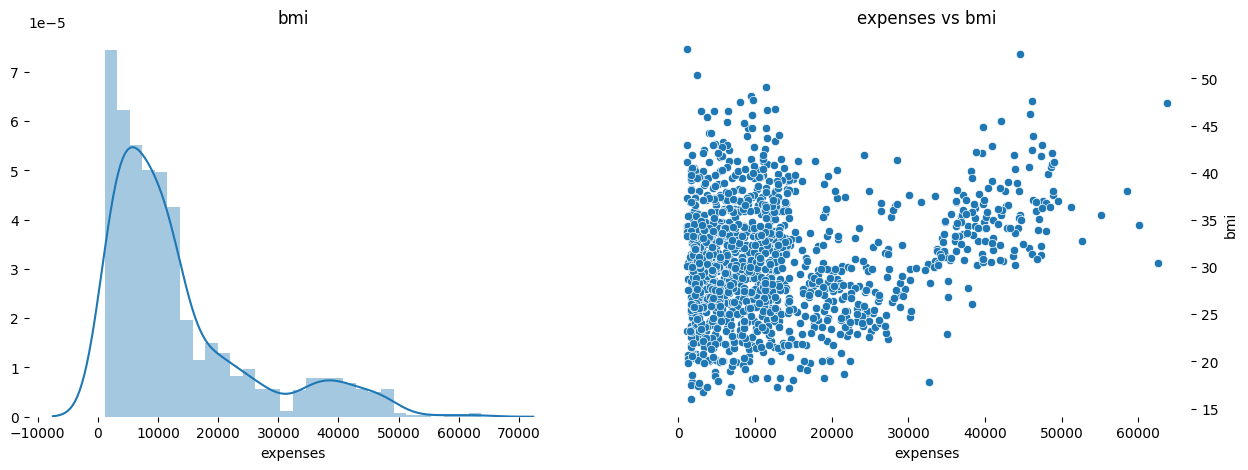

In [20]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(df['expenses'], ax=axes[0])
sns.scatterplot(x='expenses',y='bmi', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='expenses', ylabel='', title='bmi')
axes[1].set(xlabel='expenses', ylabel='bmi', title='expenses vs bmi')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

[Text(0.5, 0, 'sex'),
 Text(0, 0.5, 'expenses'),
 Text(0.5, 1.0, 'sex vs expenses')]

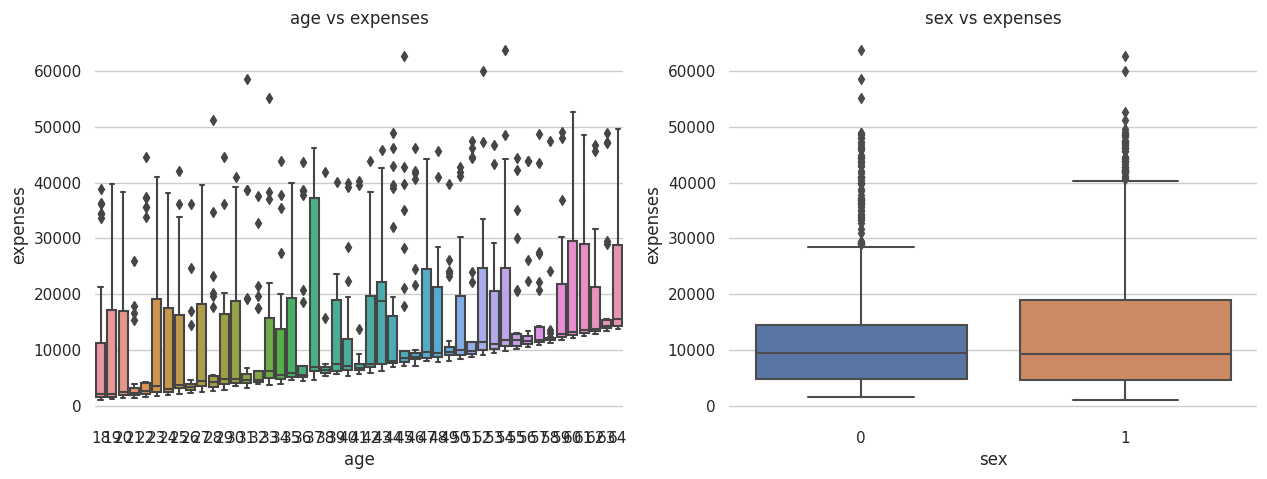

In [21]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['age'],y=df['expenses'], ax=axes[0])
sns.boxplot(x=df['sex'],y=df['expenses'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='age', ylabel='expenses', title='age vs expenses')
axes[1].set(xlabel='sex', ylabel='expenses', title='sex vs expenses')

In [26]:
# Features
X = df.drop('expenses',axis=1)
X = df.drop('region',axis=1)
# Label
y = df['expenses']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 6)
(402, 6)
(936,)
(402,)


In [28]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


In [29]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [30]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
8/8 [==============================] - 2s 43ms/step - loss: 330295360.0000 - val_loss: 304837472.0000
Epoch 2/400
8/8 [==============================] - 0s 8ms/step - loss: 330293152.0000 - val_loss: 304835232.0000
Epoch 3/400
8/8 [==============================] - 0s 5ms/step - loss: 330290368.0000 - val_loss: 304832128.0000
Epoch 4/400
8/8 [==============================] - 0s 7ms/step - loss: 330286496.0000 - val_loss: 304827584.0000
Epoch 5/400
8/8 [==============================] - 0s 7ms/step - loss: 330280672.0000 - val_loss: 304820672.0000
Epoch 6/400
8/8 [==============================] - 0s 6ms/step - loss: 330271488.0000 - val_loss: 304809440.0000
Epoch 7/400
8/8 [==============================] - 0s 5ms/step - loss: 330256480.0000 - val_loss: 304791648.0000
Epoch 8/400
8/8 [==============================] - 0s 5ms/step - loss: 330234080.0000 - val_loss: 304764224.0000
Epoch 9/400
8/8 [==============================] - 0s 5ms/step - loss: 330199392.0000 - val_los

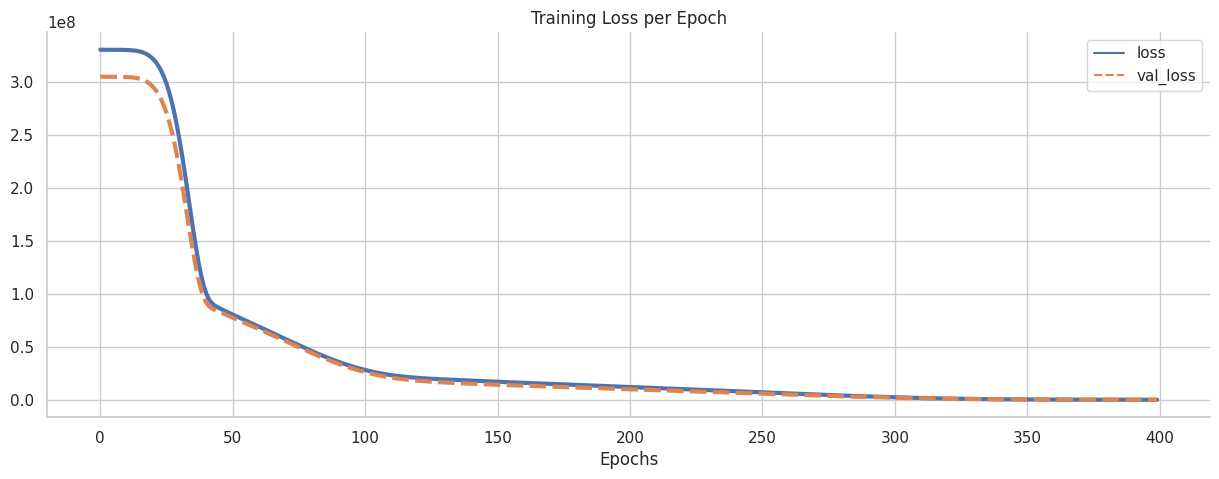

In [31]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [33]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['expenses'].describe())

13/13 [==============================] - 0s 926us/step
MAE:  128.06910057864974
MSE:  35245.11259856801
RMSE:  187.73681737626217
Variance Regression Score:  0.999749349903138


Descriptive Statistics:
 count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64


<ipython-input-40-d7d7a88d3226>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

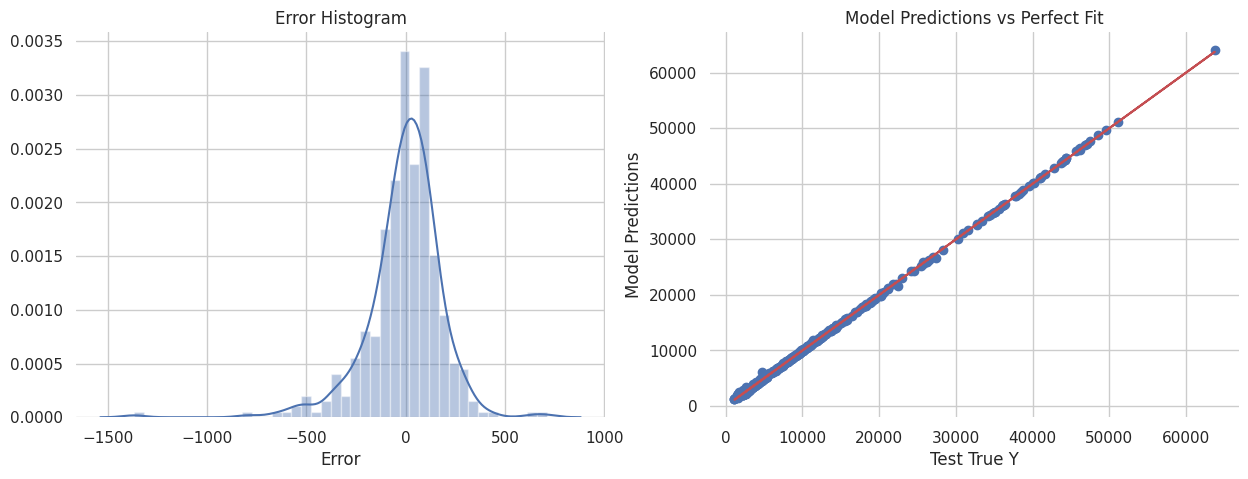

In [40]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(402, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')